In [53]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] =2
plt.rc('font', family='serif')
size=16
plt.rc('xtick', labelsize=size)
plt.rc('ytick', labelsize=size)
plt.rc('axes', labelsize=size)

# Term deposit prediction of a bank

### Rabindev Bishal 


# Outlines

#### 1. Problem definition
#### 2. Importing data and its visualization
#### 3 . Find the effective independent variables and target variables 
#### 4. Model selection
#### 5. Training and testing the data
#### 6. Fitting the model and prediction
#### 7. Confusion matrix and effectiveness of the model
#### 8. Conclusion


## Problem definition 

#### (a) The dataset  is related to direct marketing campaigns (phone calls) of a Portuguese banking institution.

#### (b) Independent variables are like age, housing loan, last call duration, marital status, etc.

#### (c) The classification goal is to predict whether the client will subscribe  to a term deposit (variable y). 


### Importing required libraries

In [54]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=25)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
# sns.set(style="dark",palette='deep')
sns.set(style="white", color_codes=True,font_scale=1)

### Importing data sets 

In [55]:
data=pd.read_csv("https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv",header=0)
data=data.dropna()

### Observing first five data

In [56]:
data.shape

(41188, 21)

In [57]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Basic description of data

In [58]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Independent variables

In [59]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

### Independent variables

#### 1. age (numeric)
#### 2. job : type of job (categorical)
#### 3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
#### 4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
#### 5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
#### 6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
#### 7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)


#### 8. contact: contact communication type (categorical: “cellular”, “telephone”)
#### 9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
#### 10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
#### 12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#### 13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#### 14. previous: number of contacts performed before this campaign and for this client (numeric)



#### 15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
#### 16. emp.var.rate: employment variation rate — (numeric)
#### 17. cons.price.idx: consumer price index — (numeric)
#### 18. cons.conf.idx: consumer confidence index — (numeric)
#### 19. euribor3m: euribor 3 month rate — (numeric)
#### 20. nr.employed: number of employees — (numeric)
#### 11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). 

### Checking the any missing values are there in the data set 

In [60]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Data Visualization

### Bar plot for the dependent variable 

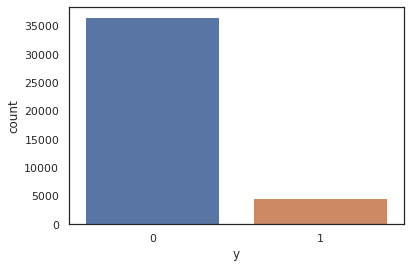

In [61]:
sns.countplot(x='y',data=data)

In [62]:
y2=data["y"].tolist()
print("Percentage of not subscriber is =",y2.count(0)*100/len(y2))
print("Percentage of subscriber is =",y2.count(1)*100/len(y2))

Percentage of not subscriber is = 88.73458288821988
Percentage of subscriber is = 11.26541711178013


### Average property of the columns group by the target variable y

In [63]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Observations and comments:

-  The customers who bought the term deposit have higher mean age comapre the customers who didn't buy the term deposit.
-  Lower the average pdays better the subscription. It means the customers who were contacted recently compare to others have subscribed to the term deposit.  
- Interesting observation is that in the recent campaign the customers who bought the term deposit.

### Affect of job


#### The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.


Text(0, 0.5, 'Frequency of Purchase')

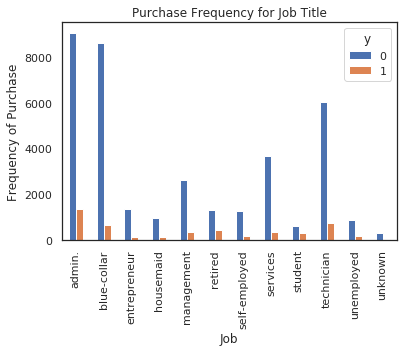

In [64]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

### Affect of education on target variavle

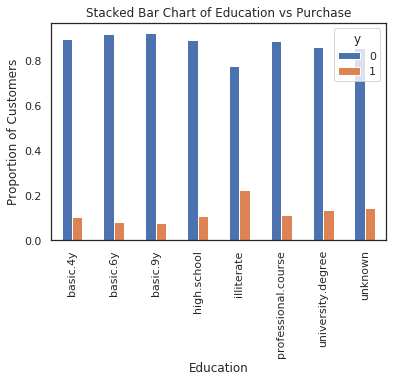

In [65]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

### Affect of day on target variable

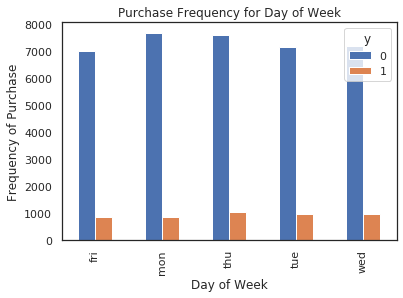

In [66]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

### Month dependence on target variable

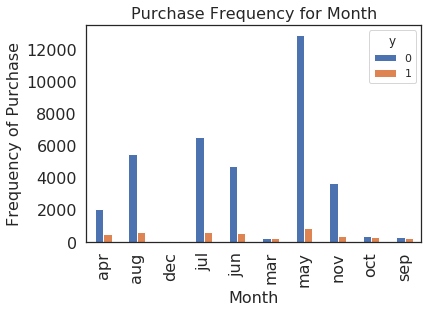

In [67]:
fsize=16
pd.crosstab(data.month,data.y).plot(kind='bar',fontsize=fsize)
plt.title('Purchase Frequency for Month',fontsize=fsize)
plt.xlabel('Month',fontsize=fsize)
plt.ylabel('Frequency of Purchase',fontsize=fsize)
plt.savefig('pur_fre_month_bar',fontsize=fsize)

#####  There is  a influence of the month dependence on the target variable.

### Affect of marital status on target variable

#### The maritial status has  no strong influence on the dependent variable.

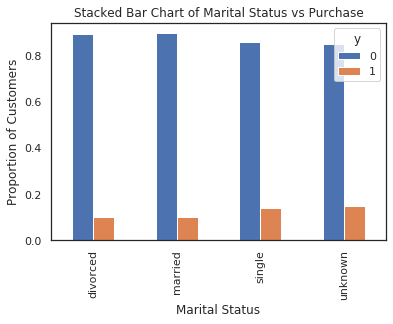

In [68]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

### Affect of day on target variables


Text(0, 0.5, 'Frequency of Purchase')

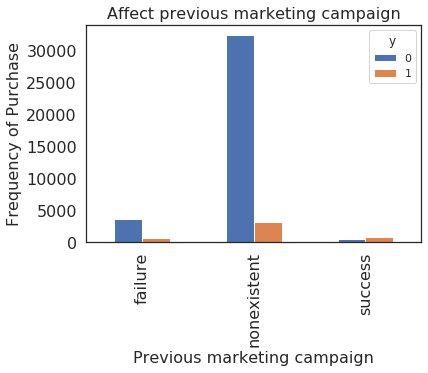

In [69]:
fsize=16
pd.crosstab(data.poutcome,data.y).plot(kind='bar',fontsize=fsize)
plt.title('Affect previous marketing campaign',fontsize=fsize)
plt.xlabel('Previous marketing campaign',fontsize=fsize)
plt.ylabel('Frequency of Purchase',fontsize=fsize)


### Affect of personal loan on term deposit

Text(0, 0.5, 'Frequency of Purchase')

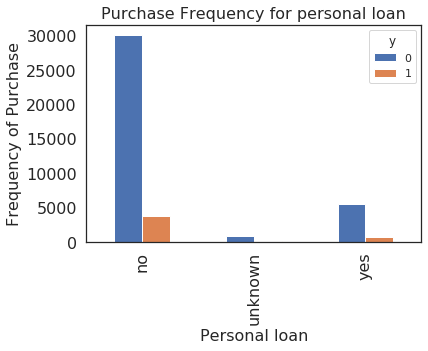

In [70]:
fsize=16
pd.crosstab(data.loan,data.y).plot(kind='bar',fontsize=fsize)
plt.title('Purchase Frequency for personal loan',fontsize=fsize)
plt.xlabel('Personal loan',fontsize=fsize)
plt.ylabel('Frequency of Purchase',fontsize=fsize)



### There is a very small affect of day on target variable. This feature would not be a good independent variable. 

## Data Processing

In [71]:
df=data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1)



### Creating dummy variables

In [72]:
data2 = pd.get_dummies(df, columns =['job', 'marital', 'default', 'housing', 'loan','poutcome'])

### Checking independence between the independent variables 

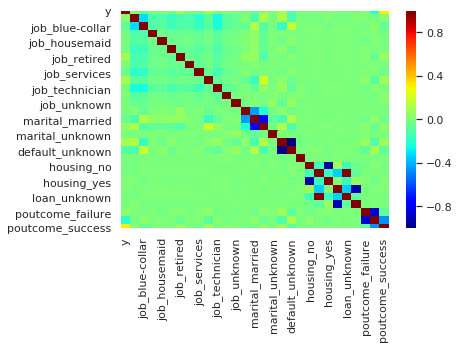

In [73]:
sns.heatmap(data2.corr(),cmap='jet')

### Logistic Regression

Logistic regression is a classification technique which is used to predict the probability of a categorical dependent variable. The dependent variables are in binary form that contains data codes as 0 (failure,no,etc) and 1(success,yes,etc). This technique predicts the probability of Y(dependent variable) as a function of X. It predicts the probability of occurrence of an event by fitting data to a logit function.



### Basic assumption in Logistic regression method

#### (a) Binary logistic regression requires the dependent variable to be binary.
#### (b) For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
#### (c) Only the meaningful variables should be included.
#### (d) The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#### (e) The dependent variable need not to be normally distributed.
####  (f) It does not uses OLS (Ordinary Least Square) for parameter estimation. Instead, it uses maximum likelihood estimation (MLE).
    
    

### Splitting data sets into train and test data 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [75]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### X: All the independent variables to create the model.
#### y: The target variable.

### Fitting the model 

In [76]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction on the test data

In [77]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Creating confusion matrix 

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10850   131]
 [ 1104   272]]


### Classification report 

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.67      0.20      0.31      1376

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.63     12357
weighted avg       0.88      0.90      0.87     12357



### ROC curve 

#### The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 

#### The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

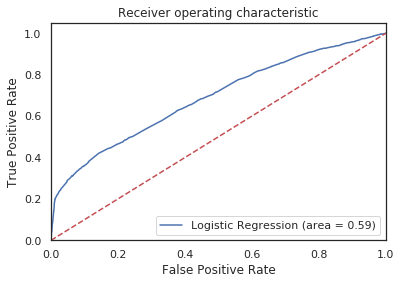

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusions:

#### (1) We have used logistic regression technique to predict that a customer would subscribe a term deposit of a bank.
####  (2) In this particular dataset shows that job, marital status, housing loan, previous campaign has more effect on the subscription of the term deposit compare to the other attributes.
####  (3) We have computed the precision level from the confusion matrix which suggests the desinged model is quite effective to decide if a customer would subscribe a given term deposit.